In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from PIL import Image

# TensorFlow and Keras for image preprocessing and model operations
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For displaying images in the notebook
from IPython.display import display

# sklearn for additional data preprocessing
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder


2024-05-17 06:15:46.491094: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/a1234/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Load the dataset
labels = pd.read_csv('Resources/sample_labels_cleaned.csv')

# Display the first few rows of the dataframe to understand its structure
print(labels.head())

# Assuming images are stored in a folder named 'Images' within the current directory
image_dir = 'Images'

# Append the full path to the image filenames in the dataframe
labels['image_path'] = labels['Image Index'].apply(lambda x: os.path.join(image_dir, x))

# Display the updated dataframe with image paths
print(labels[['Image Index', 'image_path']].head())


        Image Index                                     Finding Labels  \
0  00000013_005.png  ['Emphysema', 'Infiltration', 'Pleural_Thicken...   
1  00000013_026.png                      ['Cardiomegaly', 'Emphysema']   
2  00000017_001.png                                     ['No Finding']   
3  00000030_001.png                                    ['Atelectasis']   
4  00000032_001.png              ['Cardiomegaly', 'Edema', 'Effusion']   

   Follow-up #  Patient ID  Patient Age  Patient Gender  View Position  \
0          5.0        13.0         60.0               1              0   
1         26.0        13.0         57.0               1              0   
2          1.0        17.0         77.0               1              0   
3          1.0        30.0         79.0               1              1   
4          1.0        32.0         55.0               0              0   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  ...  \
0              3056.0         

### Visualizing Images and Metadata
This step involves loading a few images using the paths stored in your DataFrame and displaying them alongside their metadata to visually confirm everything is aligned correctly.

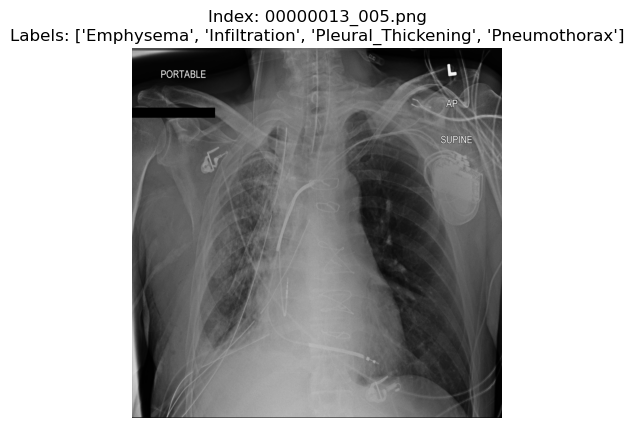

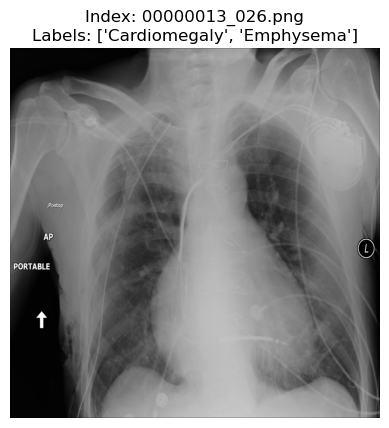

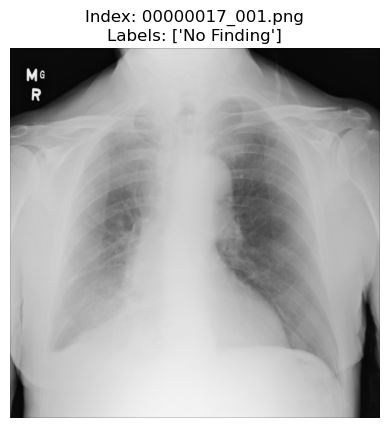

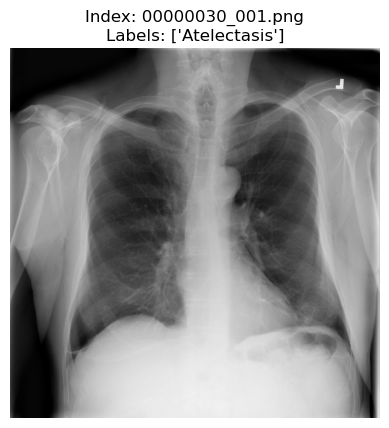

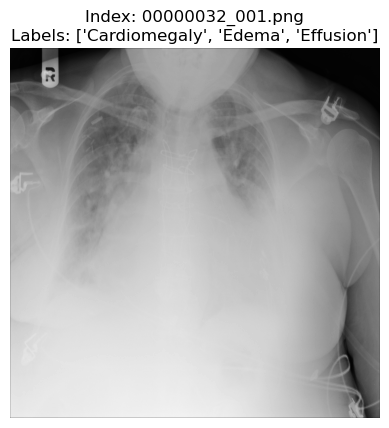

In [4]:
import matplotlib.pyplot as plt

def display_image_and_info(row):
    """Function to display an image and its metadata."""
    img_path = row['image_path']
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Index: {row['Image Index']}\nLabels: {row['Finding Labels']}")
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

# Display the first 5 images and their associated metadata
for index, row in labels.head(5).iterrows():
    display_image_and_info(row)


#### Image Preprocessing
In this step, you will set up image preprocessing functions that perform resizing and normalization, and optionally, data augmentation. These functions will then be used to process images before they are fed into your machine learning model.

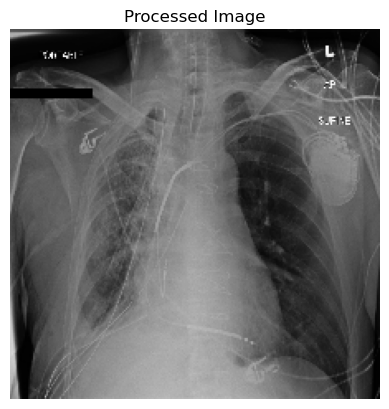

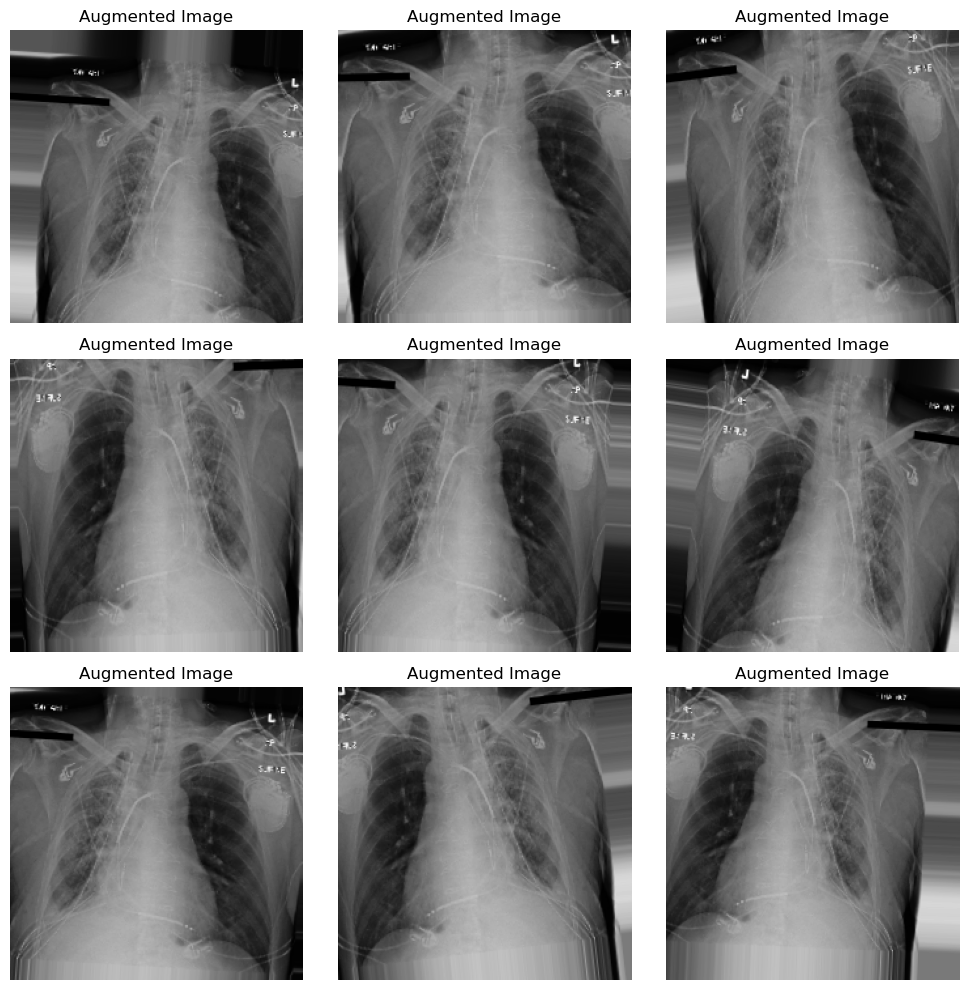

In [5]:
# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    """Load, resize, and normalize an image."""
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')  # Load and resize the image
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array /= 255.0  # Normalize the image array
    return img_array

# Optional: Setup data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=10,  # Degree range for random rotations
    width_shift_range=0.1,  # Fraction of total width for horizontal shifts
    height_shift_range=0.1,  # Fraction of total height for vertical shifts
    shear_range=0.1,  # Shearing intensity
    zoom_range=0.1,  # Zoom range
    horizontal_flip=True,  # Allow horizontal flipping
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Example of preprocessing and data augmentation on a single image
sample_image_path = labels['image_path'].iloc[0]
processed_image = preprocess_image(sample_image_path)

# Display the processed image
plt.imshow(processed_image.squeeze(), cmap='gray')  # Use squeeze to remove single-dimensional entries from the shape
plt.title("Processed Image")
plt.axis('off')
plt.show()

# If you want to visualize augmented images
sample_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension
augmented_images = datagen.flow(sample_image, batch_size=1)  # Generate batches of augmented images

# Display a few augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(augmented_images)
    aug_image = batch[0].squeeze()  # Remove batch dimension
    plt.imshow(aug_image, cmap='gray')
    plt.title("Augmented Image")
    plt.axis('off')
plt.tight_layout()
plt.show()
